Descargaremos los datos de [Kaggle news dataset](https://www.kaggle.com/rmisra/news-category-dataset)

Context
This dataset contains around 200k news headlines from the year 2012 to 2018 obtained from HuffPost. The model trained on this dataset could be used to identify tags for untracked news articles or to identify the type of language used in different news articles.

Content
Each news headline has a corresponding category. Categories and corresponding article counts are as follows:

```python
POLITICS: 32739

WELLNESS: 17827

ENTERTAINMENT: 16058

TRAVEL: 9887

STYLE & BEAUTY: 9649

PARENTING: 8677

HEALTHY LIVING: 6694

QUEER VOICES: 6314

FOOD & DRINK: 6226

BUSINESS: 5937

COMEDY: 5175

SPORTS: 4884

BLACK VOICES: 4528

HOME & LIVING: 4195

PARENTS: 3955

THE WORLDPOST: 3664

WEDDINGS: 3651

WOMEN: 3490

IMPACT: 3459

DIVORCE: 3426

CRIME: 3405

MEDIA: 2815

WEIRD NEWS: 2670

GREEN: 2622

WORLDPOST: 2579

RELIGION: 2556

STYLE: 2254

SCIENCE: 2178

WORLD NEWS: 2177

TASTE: 2096

TECH: 2082

MONEY: 1707

ARTS: 1509

FIFTY: 1401

GOOD NEWS: 1398

ARTS & CULTURE: 1339

ENVIRONMENT: 1323

COLLEGE: 1144

LATINO VOICES: 1129

CULTURE & ARTS: 1030

EDUCATION: 1004
```

In [ ]:
!gdown --id 11WiaQyivawA9hXEXZRqypCxAS53ER3Wx # Los guardé en mi google drive con esta id

Downloading...
From: https://drive.google.com/uc?id=11WiaQyivawA9hXEXZRqypCxAS53ER3Wx
To: /content/News_Category_Dataset_v2.json
100% 83.9M/83.9M [00:00<00:00, 109MB/s]


In [ ]:
!pip install transformers #Instalamos libreria de huggingface, es la más grande a la hora de modelos de NLP

     |████████████████████████████████| 3.3 MB 5.2 MB/s 
     |████████████████████████████████| 596 kB 54.3 MB/s 
     |████████████████████████████████| 61 kB 433 kB/s 
     |████████████████████████████████| 895 kB 49.5 MB/s 
     |████████████████████████████████| 3.3 MB 28.3 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
import tensorflow as tf
import numpy as np
import sklearn
from sklearn import metrics
import transformers
from transformers import AutoTokenizer, TFAutoModelForSequenceClassification
import json
import matplotlib.pyplot as plt
import random
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

Podemos encontrar modelos en español hemos por el DCC Uchile: https://huggingface.co/dccuchile

O GPT-2: https://huggingface.co/DeepESP/gpt2-spanish

# TPU

Usaremos TPU para acelerar el entrenamiento

In [ ]:
# detect and init the TPU
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

batch_size=32 * tpu_strategy.num_replicas_in_sync
print('Batch size:', batch_size)
AUTOTUNE = tf.data.experimental.AUTOTUNE

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.114.21.18:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.114.21.18:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Batch size: 256


##Visualize and preprocess data

Let's load the data. We will combine the title and the description into a single string we will use as input for the model.

In [ ]:
data = [json.loads(line) for line in open('./News_Category_Dataset_v2.json', 'r')] #Load data from json file
random.shuffle(data) #shuffle the data 
labels=[]
headlines=[]
texts=[]
for line in data:
    labels.append(line['category'])
    headlines.append(line['headline'])
    text=line['headline']+' '+line['short_description'] #Combine headline and description into a single text input
    texts.append(text)


In [ ]:
# Equivalentemente podriamos haberlo leído con pandas
import pandas as pd
pd.read_json("./News_Category_Dataset_v2.json", lines=True)

# df = pd.read_json("./News_Category_Dataset_v2.json", lines=True)
# labels = df["category"].to_list()
# headlines = df["headline"].to_list()
# text = (df["headline"] + " " + df["short_description"]).to_list()

,category,headline,authors,link,short_description,date
0,CRIME,There Were 2 Mass Shootings In Texas Last Week...,Melissa Jeltsen,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...,2018-05-26
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
...,...,...,...,...,...,...
200848,TECH,RIM CEO Thorsten Heins' 'Significant' Plans Fo...,"Reuters, Reuters",https://www.huffingtonpost.com/entry/rim-ceo-t...,Verizon Wireless and AT&T are already promotin...,2012-01-28
200849,SPORTS,Maria Sharapova Stunned By Victoria Azarenka I...,,https://www.huffingtonpost.com/entry/maria-sha...,"Afterward, Azarenka, more effusive with the pr...",2012-01-28
200850,SPORTS,"Giants Over Patriots, Jets Over Colts Among M...",,https://www.huffingtonpost.com/entry/super-bow...,"Leading up to Super Bowl XLVI, the most talked...",2012-01-28
200851,SPORTS,Aldon Smith Arrested: 49ers Linebacker Busted ...,,https://www.huffingtonpost.com/entry/aldon-smi...,CORRECTION: An earlier version of this story i...,2012-01-28


Let's explore the data

In [ ]:
n_elements=len(headlines)
print('Elements in dataset:', n_elements)
categories=sorted(list(set(labels))) #set will return the unique different entries
n_categories=len(categories)
print("{} categories found:".format(n_categories))
for category in categories:
    print(category)

Elements in dataset: 200853
41 categories found:
ARTS
ARTS & CULTURE
BLACK VOICES
BUSINESS
COLLEGE
COMEDY
CRIME
CULTURE & ARTS
DIVORCE
EDUCATION
ENTERTAINMENT
ENVIRONMENT
FIFTY
FOOD & DRINK
GOOD NEWS
GREEN
HEALTHY LIVING
HOME & LIVING
IMPACT
LATINO VOICES
MEDIA
MONEY
PARENTING
PARENTS
POLITICS
QUEER VOICES
RELIGION
SCIENCE
SPORTS
STYLE
STYLE & BEAUTY
TASTE
TECH
THE WORLDPOST
TRAVEL
WEDDINGS
WEIRD NEWS
WELLNESS
WOMEN
WORLD NEWS
WORLDPOST


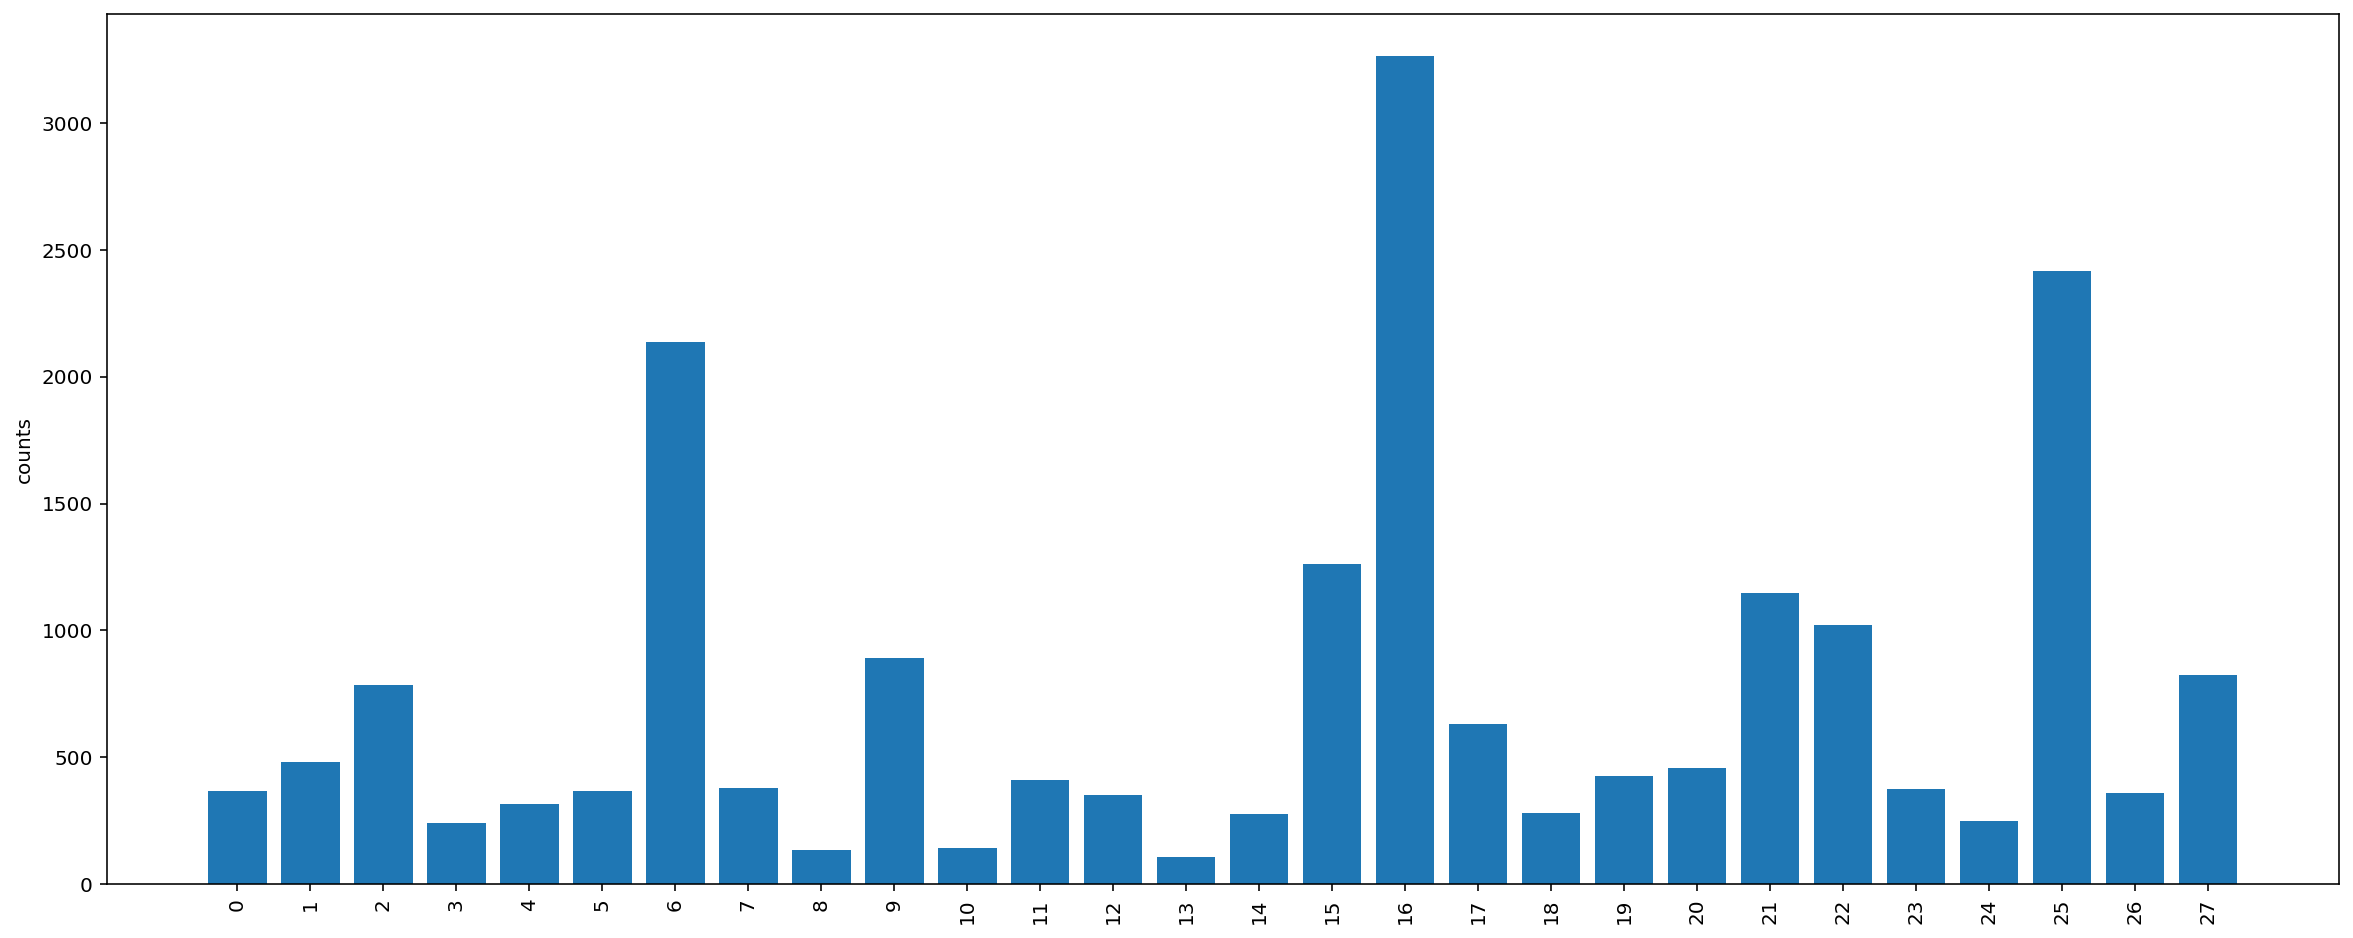

In [ ]:
fig=plt.figure(figsize=(20,8))
lbl, counts = np.unique(labels,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks,lbl)
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.show()

We see that we have a lot of categories with few entries. Furthermore some categories may have a significant overlapping in meaning. Since there is a significant number of categories to predict, I will aggregate the categories that refer to related concepts. This will make them easier to be distinguished by the classifier later.

In [ ]:
def aggregate_categories(labels):
    aggregated=[]
    for line in labels:
        if line=='WORLDPOST' or line=='THE WORLDPOST':
            aggregated.append('WORLD NEWS')
        elif line=='PARENTING' or line=='PARENTS':
            aggregated.append('PARENTS & PARENTING')
        elif line=='ARTS' or line=='CULTURE & ARTS':
            aggregated.append('ARTS & CULTURE')
        elif line=='STYLE':
            aggregated.append('STYLE & BEAUTY')
        elif line=='GREEN' or line=='ENVIRONMENT':
            aggregated.append('ENVIRONMENT & GREEN')
        elif line=='HEALTHY LIVING' or line=='WELLNESS':
            aggregated.append('WELLNESS & HEALTHY LIVING')
        elif line=='COMEDY' or line=='ENTERTAINMENT':
            aggregated.append('ENTERTAINMENT & COMEDY')
        elif line=='TASTE' or line=='FOOD & DRINK':
            aggregated.append('FOOD, DRINK & TASTE')
        elif line=='COLLEGE' or line=='EDUCATION':
             aggregated.append('COLLEGE & EDUCATION')
        elif line=='SCIENCE' or line=='TECH':
             aggregated.append('SCIENCE & TECH')
        elif line=='BUSINESS' or line=='MONEY':
            aggregated.append('BUSINESS & MONEY')

        else:
            aggregated.append(line)
    return aggregated

#count number of unique categories
aggregated=aggregate_categories(labels)
categories=sorted(list(set(aggregated)))
n_categories=len(categories)
print('There are {} aggregated categories:'.format(n_categories))
for category in categories:
    print(category)

There are 28 aggregated categories:
ARTS & CULTURE
BLACK VOICES
BUSINESS & MONEY
COLLEGE & EDUCATION
CRIME
DIVORCE
ENTERTAINMENT & COMEDY
ENVIRONMENT & GREEN
FIFTY
FOOD, DRINK & TASTE
GOOD NEWS
HOME & LIVING
IMPACT
LATINO VOICES
MEDIA
PARENTS & PARENTING
POLITICS
QUEER VOICES
RELIGION
SCIENCE & TECH
SPORTS
STYLE & BEAUTY
TRAVEL
WEDDINGS
WEIRD NEWS
WELLNESS & HEALTHY LIVING
WOMEN
WORLD NEWS


Let's visualize the histogram with the aggregated categories.

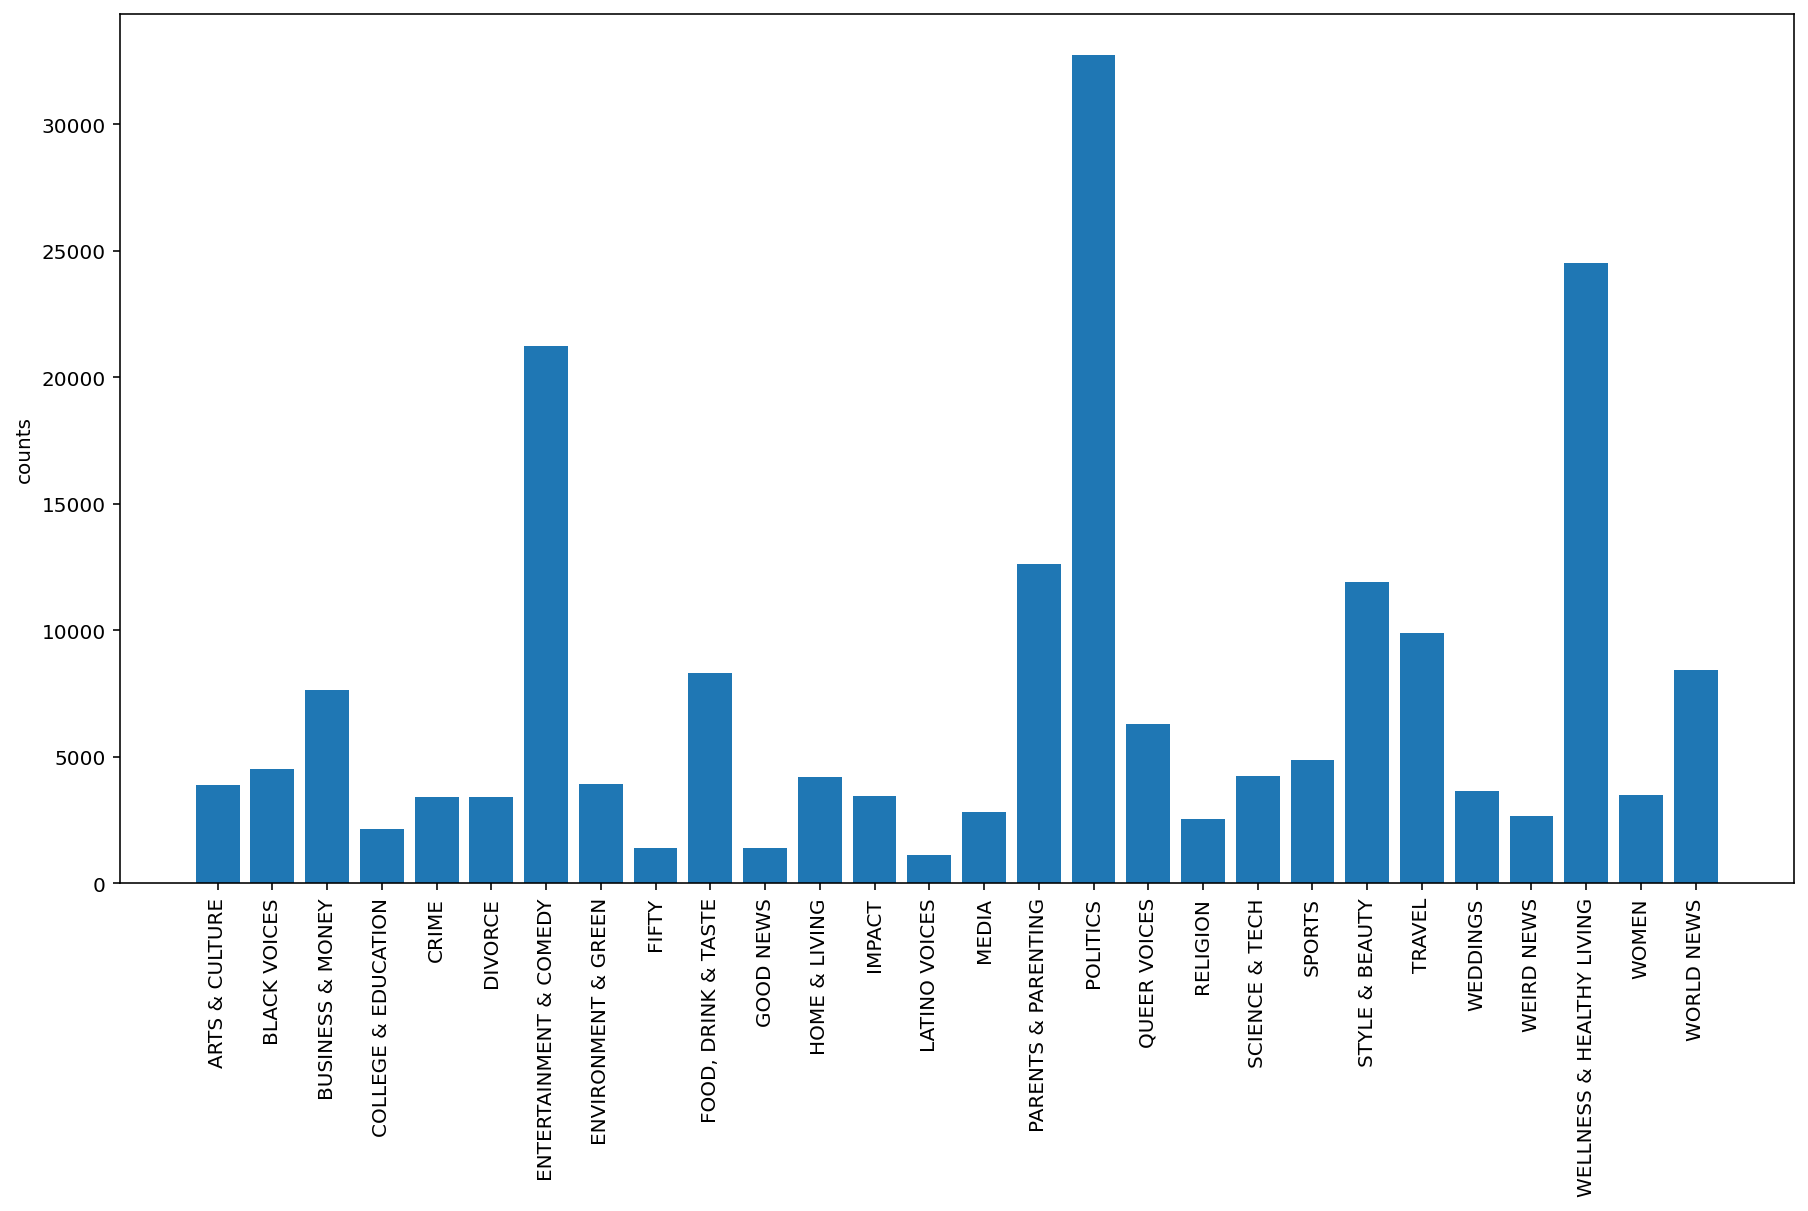

In [ ]:
fig=plt.figure(figsize=(15,8))
agg, counts = np.unique(aggregated,return_counts=True)
ticks = range(len(counts))
plt.bar(ticks,counts, align='center')
plt.xticks(ticks,agg)
plt.xticks(rotation=90)
plt.ylabel('counts')
plt.show()

Let's now prepare the dataset to feed it to the model. We need to transform the category labels into indices and to tokenize the input text. The AutoTokenizer class of Huggingface allows to tokenize the dataset using the tokenizer used in the pretraining of the model. We will use the "roberta-base" model. 

In [ ]:
pd.Series(aggregated) # Lista con las categorias, nos intereza transformarlo a números

0                          POLITICS
1                    SCIENCE & TECH
2                    STYLE & BEAUTY
3                  BUSINESS & MONEY
4         WELLNESS & HEALTHY LIVING
                    ...            
200848    WELLNESS & HEALTHY LIVING
200849          PARENTS & PARENTING
200850                     POLITICS
200851       ENTERTAINMENT & COMEDY
200852    WELLNESS & HEALTHY LIVING
Length: 200853, dtype: object

In [ ]:
pd.Series(aggregated).map( dict(zip(categories, range(len(categories)))) )
# Análogo a la función de más abajo sin utilizar for loops 
# pd.Series(aggregated).map( dict(zip(categories, range(len(categories)))) ).to_list()

0         16
1         19
2         21
3          2
4         25
          ..
200848    25
200849    15
200850    16
200851     6
200852    25
Length: 200853, dtype: int64

In [ ]:
# We have now to preprocess our data in a way that can be used by a Tensorflow Keras model. 
# As a first step, we need to turn the classes labels into indices. 
# We don’t need a one-hot encoding since we will work with TensorFlow SparseCategorical loss.

def indicize_labels(labels):
    """Transforms string labels into indices"""
    indices=[]
    for j in range(len(labels)):
        for i in range(n_categories):
            if labels[j]==categories[i]:
                indices.append(i)
    return indices


# Next, we need to tokenize the text i.e. we need to transform our strings into a list of indices 
# that can be fed to the model. 
# The transformers library provides us the AutoTokenizer class that allows loading the pre-trained 
# tokenizer used for RoBERTa.

indices=indicize_labels(aggregated) #Integer label indices
tokenizer = AutoTokenizer.from_pretrained("roberta-base") #Tokenizer

# RoBERTa uses a byte-level BPE tokenizer that performs subword tokenization, i.e. 
# unknown rare words are split into common subwords present in the vocabulary. 
# We will see what this means in examples.
# Here the flag padding=True will pad the sentence to the max length passed in the batch. 
# On the other side, truncation=True will truncate the sentences to the maximum number of 
# tokens the model can accept (512 for RoBERTa, as for BERT).
inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='tf') #Tokenized text
dataset=tf.data.Dataset.from_tensor_slices((dict(inputs), indices)) #Create a tensorflow dataset
#train test split, we use 10% of the data for validation
val_data_size=int(0.1*n_elements)
val_ds=dataset.take(val_data_size).batch(batch_size, drop_remainder=True) 
train_ds=dataset.skip(val_data_size).batch(batch_size, drop_remainder=True)
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

Downloading:   0%|          | 0.00/481 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.29M [00:00<?, ?B/s]

Let's visualize how the tokenizer splits the text into (sub)words and how text gets tokenized.

In [ ]:
tokens=tokenizer(headlines[0:3], padding=True, truncation=True)['input_ids']
for i in range(3):
  print('Input:',headlines[i])
  print('Subword tokenization:',tokenizer.tokenize(headlines[i]))
  print('Indices:', tokens[i])

Input: Think Tankers Don't Get Trump
Subword tokenization: ['Think', 'ĠTank', 'ers', 'ĠDon', "'t", 'ĠGet', 'ĠTrump']
Indices: [0, 26644, 19305, 268, 1599, 75, 2315, 140, 2, 1, 1, 1, 1, 1]
Input: 7 Surprising Household Items That Invade Your Privacy
Subword tokenization: ['7', 'ĠSur', 'prising', 'ĠHousehold', 'ĠItems', 'ĠThat', 'ĠInv', 'ade', 'ĠYour', 'ĠPrivacy']
Indices: [0, 406, 6544, 21434, 30680, 31167, 280, 9318, 1829, 2486, 17005, 2, 1, 1]
Input: The New Celebrity Makeup Uniform That's Perfect for Real Life
Subword tokenization: ['The', 'ĠNew', 'ĠCelebrity', 'ĠMake', 'up', 'ĠUniform', 'ĠThat', "'s", 'ĠPerfect', 'Ġfor', 'ĠReal', 'ĠLife']
Indices: [0, 133, 188, 14625, 5293, 658, 39555, 280, 18, 17586, 13, 2822, 3126, 2]


We see that the character 'Ġ' is used to indicate the start of a new word in the text, while the other parts of the words that get split don't contain it. For example 'reevaluate' gets split into 'Ġre' and 'evaluate'. We further notice that the tokenize uses the index 0 to indicate the beginning of the text and 2 to indicate the ending. Index 1 is reserved for padding. 

Downloading:   0%|          | 0.00/627M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/6
Instructions for updating:
use `experimental_local_results` instead.


Instructions for updating:
use `experimental_local_results` instead.


706/706 [==============================] - 520s 575ms/step - loss: 1.3822 - sparse_categorical_accuracy: 0.6498 - Sparse_Top_3_Categorical_Accuracy: 0.8224 - val_loss: 0.9522 - val_sparse_categorical_accuracy: 0.7373 - val_Sparse_Top_3_Categorical_Accuracy: 0.9049
Epoch 2/6
706/706 [==============================] - 395s 559ms/step - loss: 0.8890 - sparse_categorical_accuracy: 0.7522 - Sparse_Top_3_Categorical_Accuracy: 0.9164 - val_loss: 0.8506 - val_sparse_categorical_accuracy: 0.7549 - val_Sparse_Top_3_Categorical_Accuracy: 0.9219
Epoch 3/6
706/706 [==============================] - 395s 559ms/step - loss: 0.7801 - sparse_categorical_accuracy: 0.7760 - Sparse_Top_3_Categorical_Accuracy: 0.9313 - val_loss: 0.8174 - val_sparse_categorical_accuracy: 0.7627 - val_Sparse_Top_3_Categorical_Accuracy: 0.9271
Epoch 4/6
706/706 [==============================] - 395s 559ms/step - loss: 0.7063 - sparse_categorical_accuracy: 0.7934 - Sparse_Top_3_Categorical_Accuracy: 0.9407 - val_loss: 0.8001 

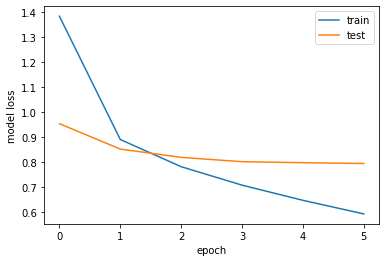

In [ ]:
with tpu_strategy.scope():
    model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", 
                                                                 num_labels=n_categories)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, clipnorm=1.),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[tf.metrics.SparseCategoricalAccuracy(),tf.keras.metrics.SparseTopKCategoricalAccuracy(k=3, name='Sparse_Top_3_Categorical_Accuracy')],
        )
 
history=model.fit(train_ds, validation_data=val_ds, epochs=2, verbose=1) # Approx 5min por Epoch

model.save_weights('./saved_weights.h5')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('model loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.savefig('train_history.png')
plt.show()

In [ ]:
trained_model = TFAutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=n_categories)
trained_model.load_weights('./saved_weights.h5')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

Some layers of TFRobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.

In [ ]:
labels=[]
texts=[]
headlines=[]
descriptions=[]
for i in range(val_data_size):
    labels.append(data[i]['category'])
    headline=data[i]['headline']
    headlines.append(headline)
    description=data[i]['short_description']
    descriptions.append(description)
    texts.append(headline+' '+description)
labels=indicize_labels(aggregate_categories(labels))
tokens=tokenizer(texts, padding=True,truncation=True, return_tensors='tf')
logits=model.predict(dict(tokens), verbose=1).logits
prob=tf.nn.softmax(logits, axis=1).numpy()
predictions=np.argmax(prob, axis=1)
confusion_matrix=tf.math.confusion_matrix(labels, predictions, num_classes=n_categories)

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 230) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 230) dtype=int32>]


628/628 [==============================] - 34s 48ms/step


Let's visualize the confusion matrix over the validation set.

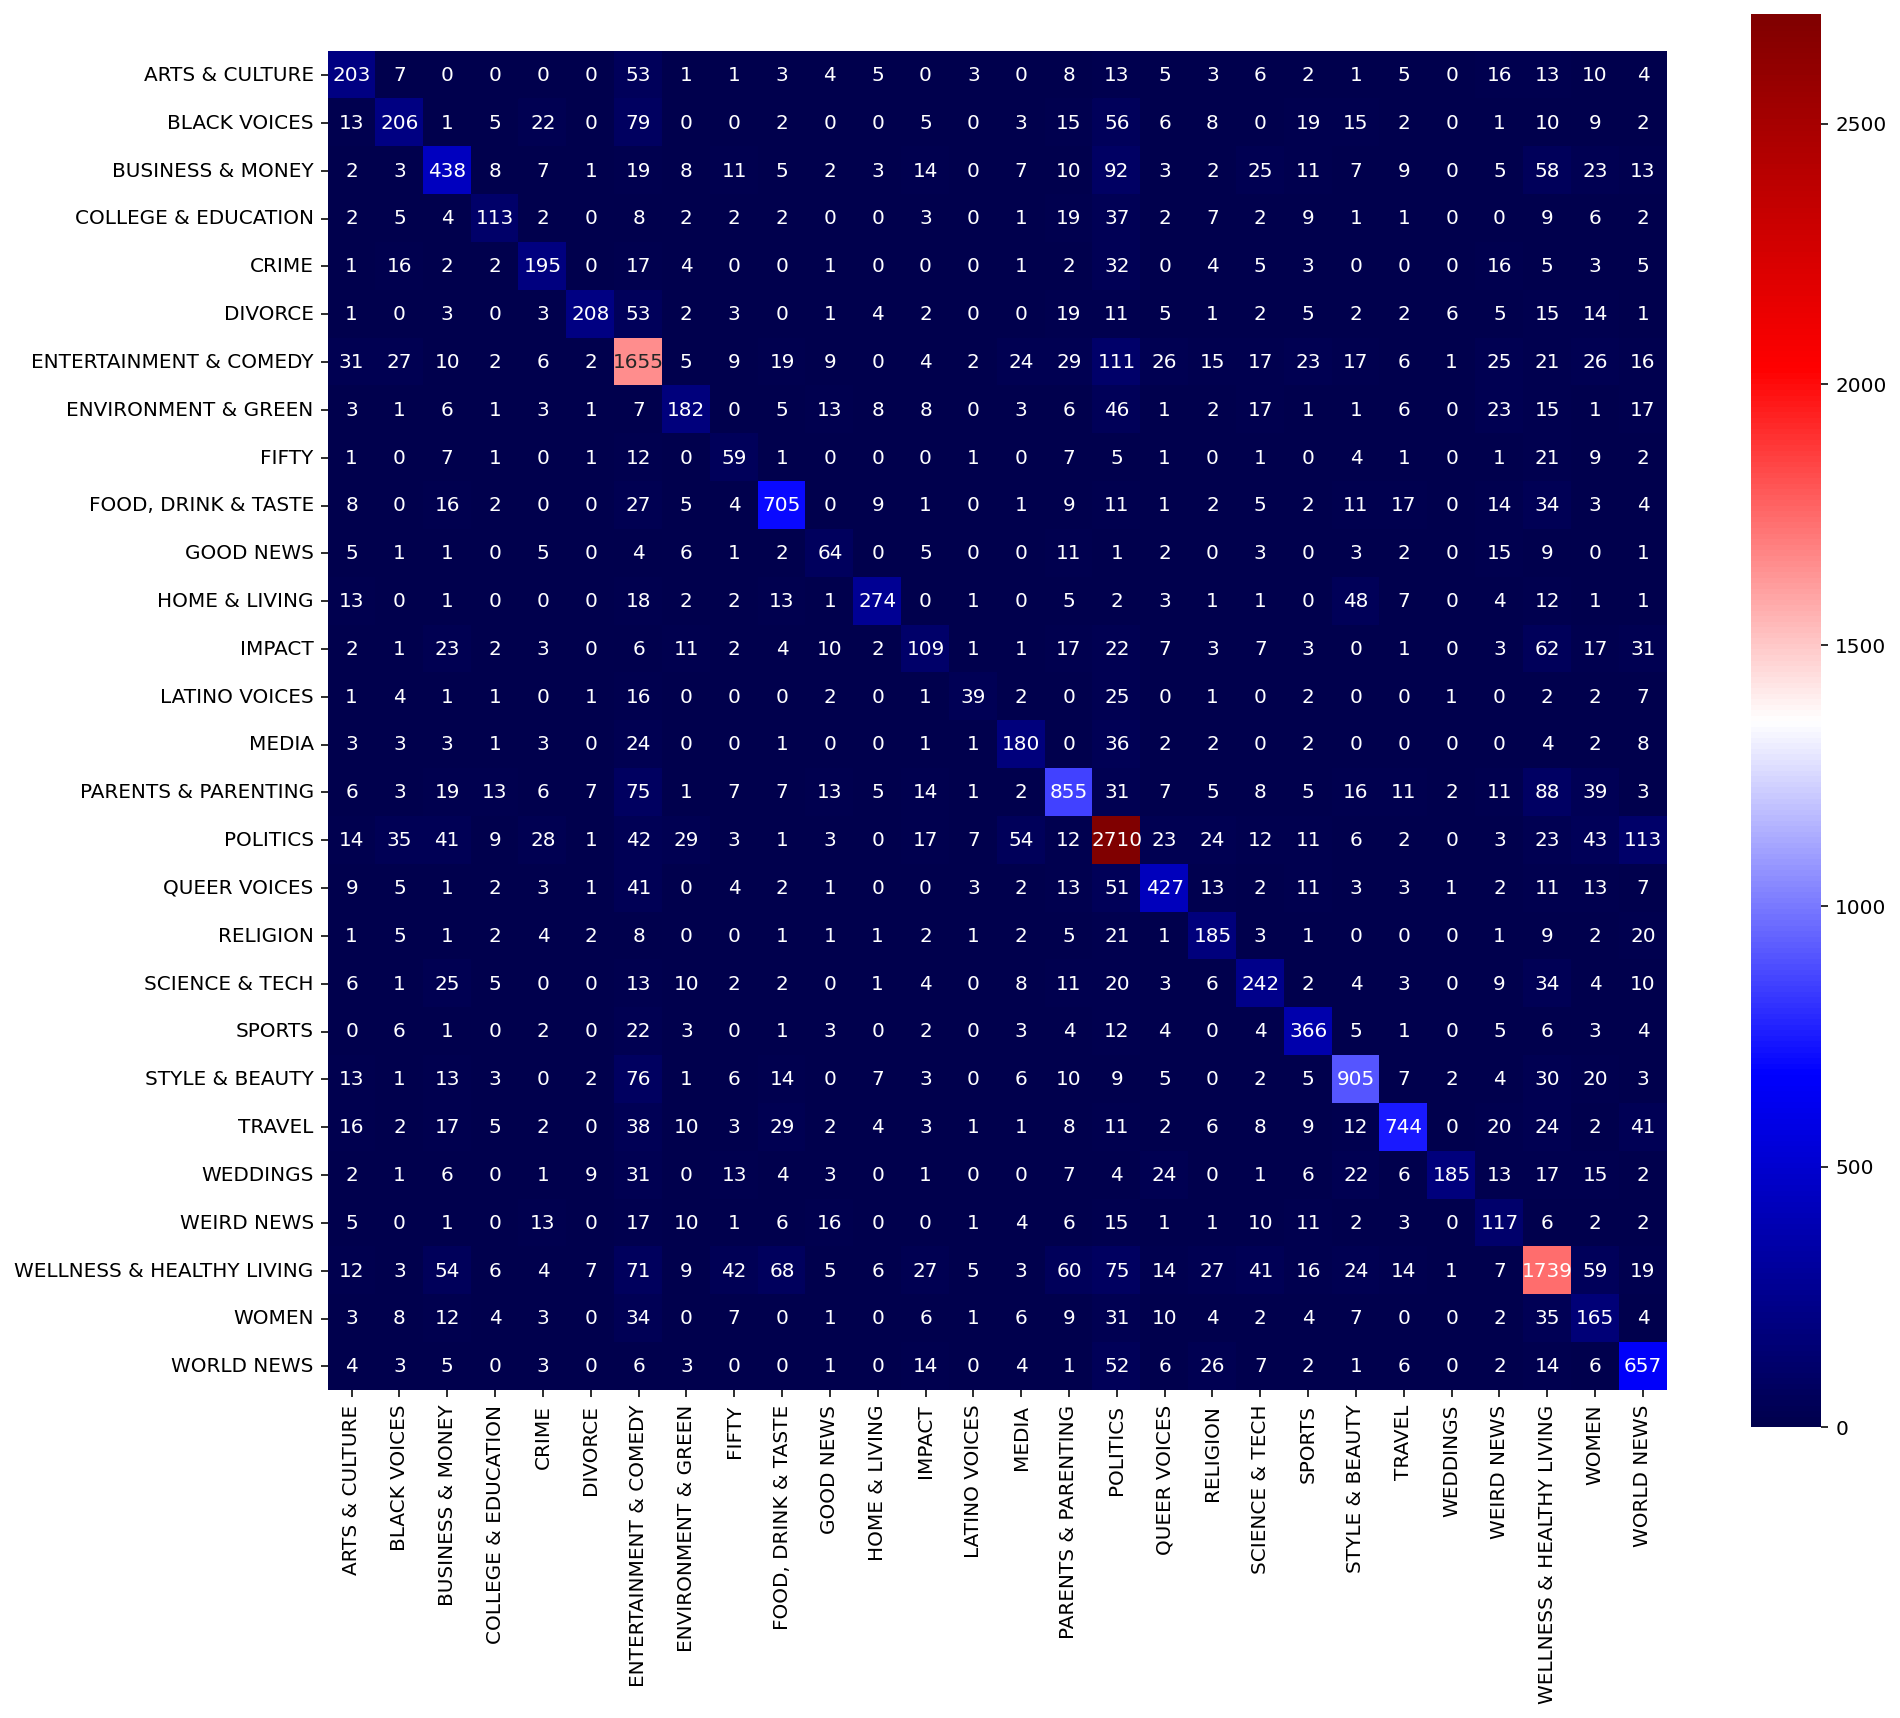

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='seismic', square=True, xticklabels=categories, yticklabels=categories) 

In [ ]:
precision=metrics.precision_score(labels, predictions, average='weighted')
recall=metrics.recall_score(labels, predictions, average='weighted')
f1=metrics.f1_score(labels, predictions, average='weighted')
print('Precision:{}, Recall:{}, F1 score:{}.'.format(precision, recall, f1))

Precision:0.7691898043966449, Recall:0.7703759024147374, F1 score:0.7686064902289391.


In [ ]:
def top_k_predictions(array, k): 
    top_k_indices=np.argsort(array)[-k:]
    top_k_probabilities=[]
    for i in range(k):
        top_k_probabilities.append(np.around(array[top_k_indices[i]]*100, decimals=1))
    return np.flip(top_k_indices), np.flip(top_k_probabilities)

for i in range(0, 15):
    print('HEADLINE:',headlines[i])
    print('SHORT DESCRIPTION:', descriptions[i])
    print('TRUE LABEL:', categories[labels[i]])
    top_3, top_prob=top_k_predictions(prob[i],3)
    print("Prediction 1:{} ({}%); Prediction 2:{} ({}%); Prediction 3:{} ({}%); \n".format(
          categories[top_3[0]], top_prob[0],categories[top_3[1]], top_prob[1],categories[top_3[2]], top_prob[2]) )

HEADLINE: Think Tankers Don't Get Trump
SHORT DESCRIPTION: Can their advice change him? Should they even try?
TRUE LABEL: POLITICS
Prediction 1:POLITICS (96.6%); Prediction 2:BUSINESS & MONEY (1.6%); Prediction 3:ENTERTAINMENT & COMEDY (0.7%); 

HEADLINE: 7 Surprising Household Items That Invade Your Privacy
SHORT DESCRIPTION: It's no secret now that web giants and telecommunications companies have gotten data requests from the National Security
TRUE LABEL: SCIENCE & TECH
Prediction 1:SCIENCE & TECH (85.6%); Prediction 2:BUSINESS & MONEY (4.3%); Prediction 3:WELLNESS & HEALTHY LIVING (2.9%); 

HEADLINE: The New Celebrity Makeup Uniform That's Perfect for Real Life
SHORT DESCRIPTION: call this makeup "You Only Better Makeup," and whether you're heading to your own red carpet event or the closest you're getting to a carpet is the one in your living room, this is makeup you can wear and love and feel great in.
TRUE LABEL: STYLE & BEAUTY
Prediction 1:STYLE & BEAUTY (99.4%); Prediction 2:EN

Let's compare the performance of the model when we feed only the headlines without the short description.

In [ ]:
labels=[]
texts=[]
for i in range(val_data_size):
    labels.append(data[i]['category'])
    headline=data[i]['headline']
    texts.append(headline)
labels=indicize_labels(aggregate_categories(labels))
labels=np.asarray(labels)
tokens=tokenizer(texts, padding=True,truncation=True, return_tensors='tf')
logits=model.predict(dict(tokens), verbose=1).logits
prob=tf.nn.softmax(logits, axis=1).numpy()
predictions=np.argmax(prob, axis=1)
confusion_matrix=tf.math.confusion_matrix(labels, predictions, num_classes=n_categories)
accuracy=metrics.accuracy_score(labels, predictions)
print('Accuracy on headlines only:{}'.format(accuracy))

INFO:absl:TPU has inputs with dynamic shapes: [<tf.Tensor 'Const:0' shape=() dtype=int32>, <tf.Tensor 'cond/Identity:0' shape=(None, 77) dtype=int32>, <tf.Tensor 'cond/Identity_8:0' shape=(None, 77) dtype=int32>]


628/628 [==============================] - 28s 36ms/step
Accuracy on headlines only:0.6934030370923575


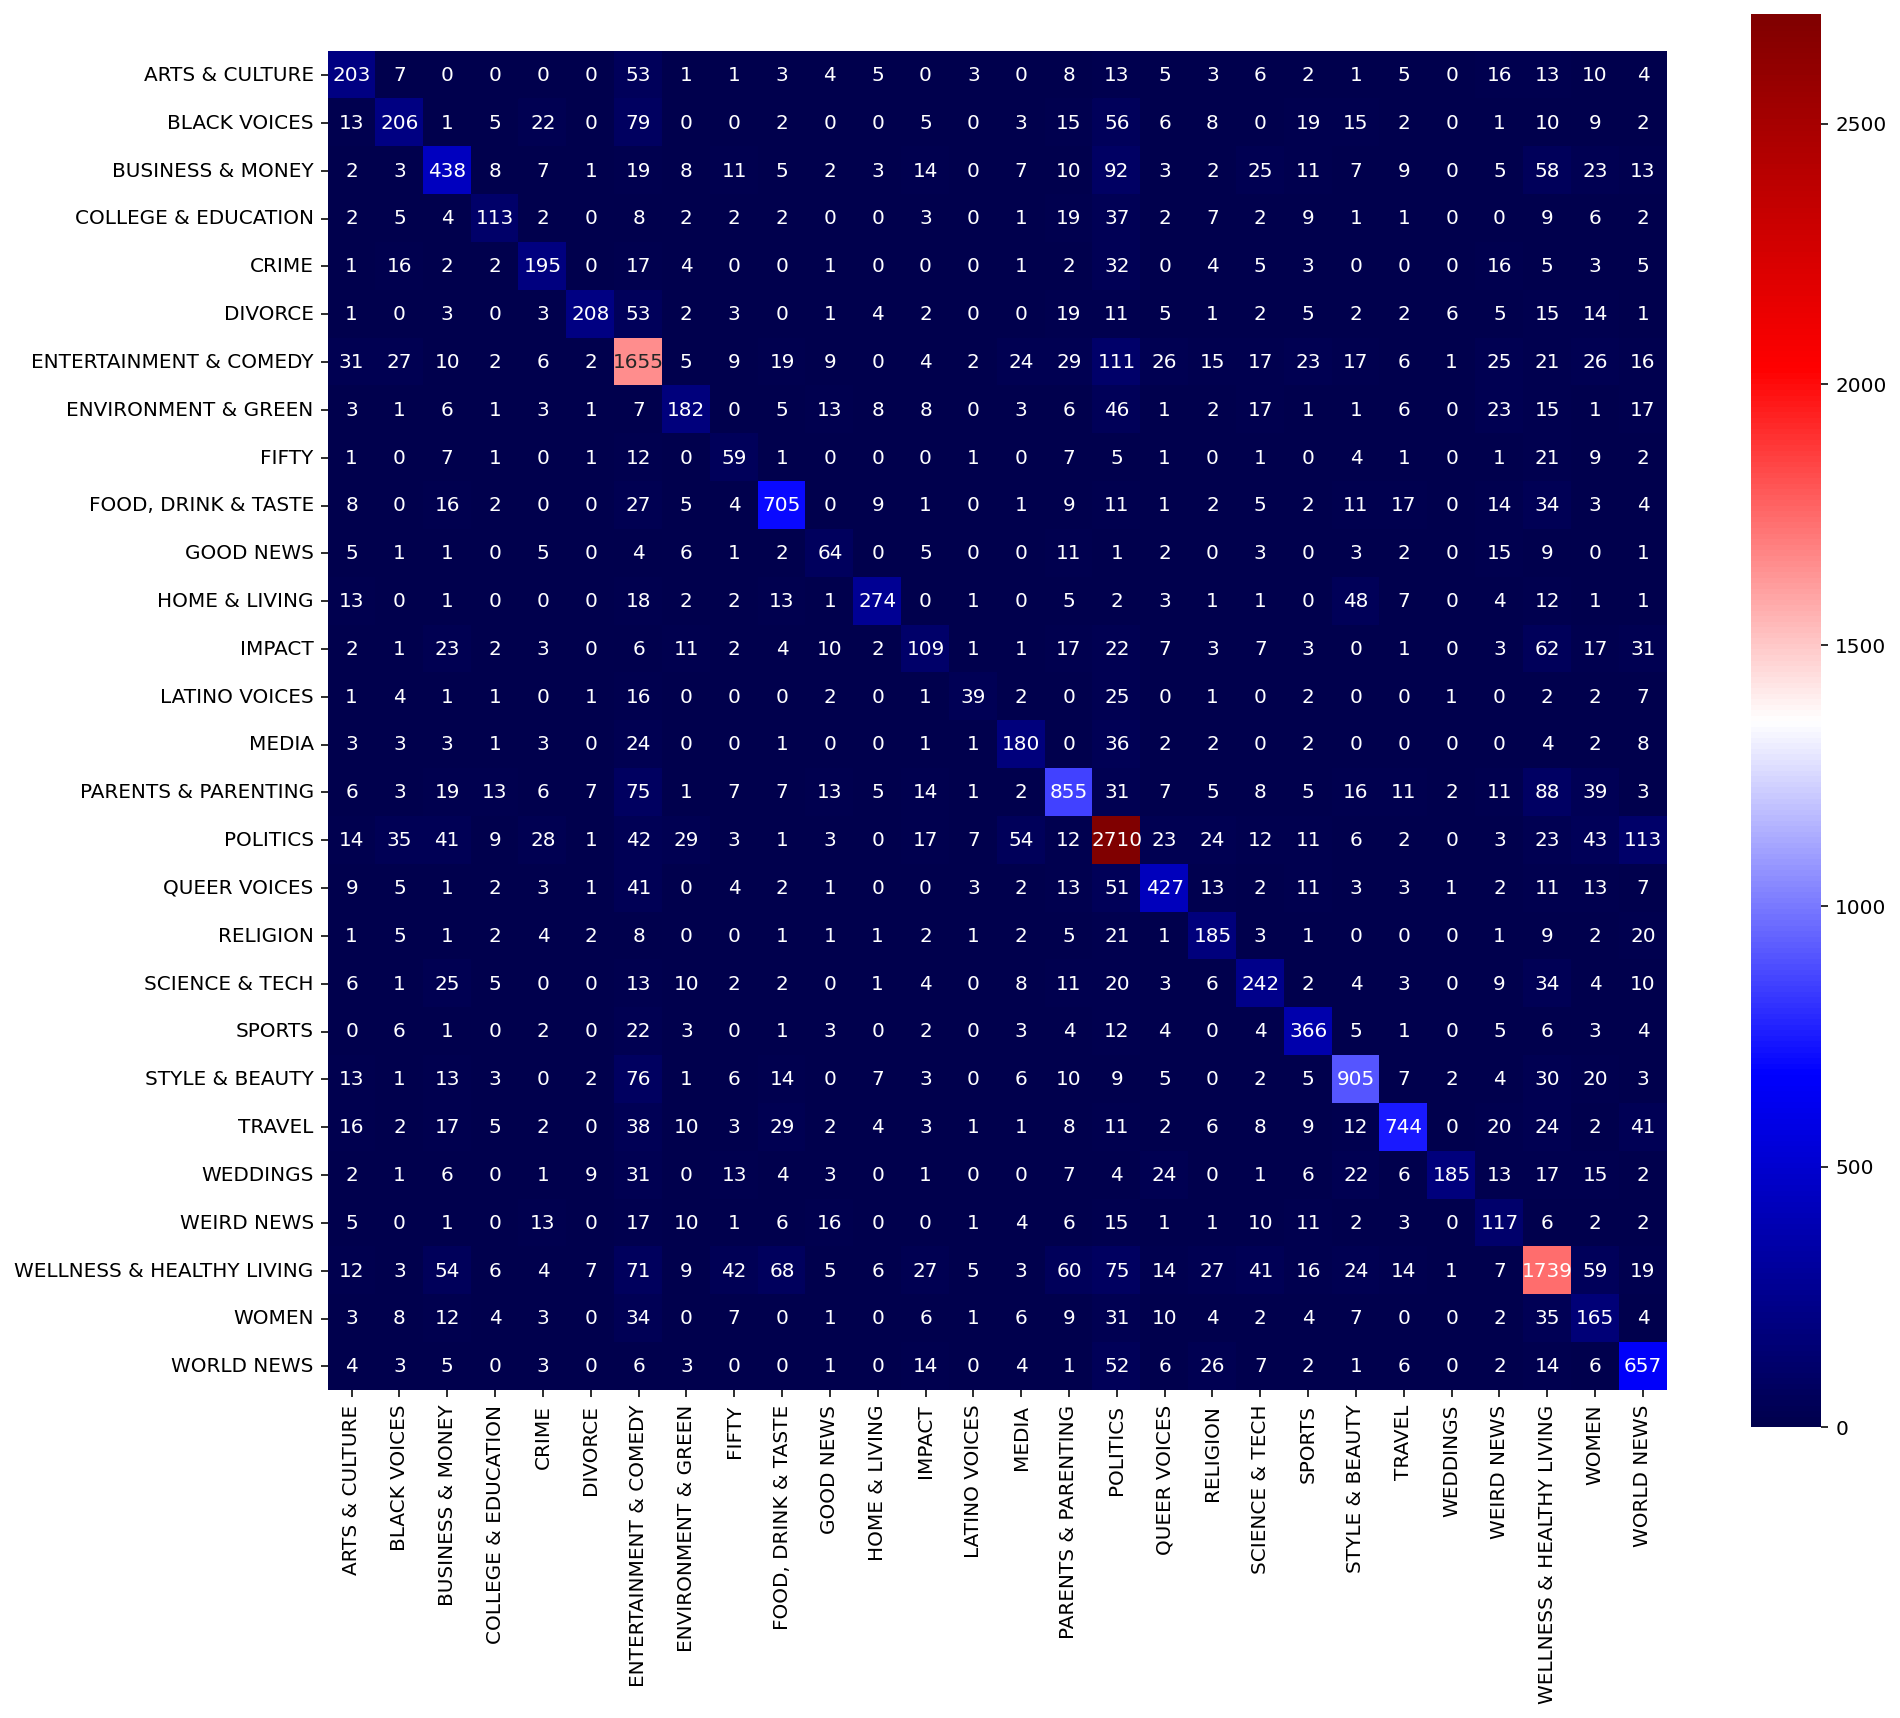

In [ ]:
plt.figure(figsize=(15,13))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='seismic', square=True, xticklabels=categories, yticklabels=categories) 

In [ ]:
precision=metrics.precision_score(labels, predictions, average='weighted')
recall=metrics.recall_score(labels, predictions, average='weighted')
f1=metrics.f1_score(labels, predictions, average='weighted')
print('Precision:{}, Recall:{}, F1 score:{}'.format(precision, recall, f1))

Precision:0.7016255988777702, Recall:0.6934030370923575, F1 score:0.6927310524944182
